In [8]:
import matplotlib.pyplot as plt
tiff = plt.imread('data/spam2017V2r1_SSA_P_COCO_A.tif')

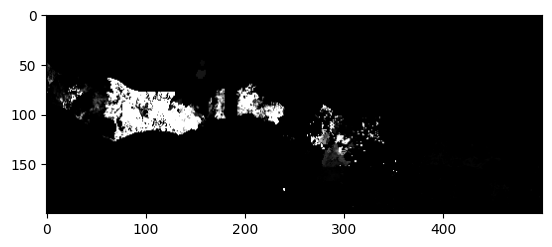

In [26]:
plt.imshow(tiff[900:1100,2000:2500, :])

In [9]:
tiff.shape

(2160, 4320, 4)

In [1]:
from osgeo import gdal
ds = gdal.Open('data/spam2017V2r1_SSA_P_COCO_A.tif')
width = ds.RasterXSize
height = ds.RasterYSize
gt = ds.GetGeoTransform()
minx = gt[0]
miny = gt[3] + width*gt[4] + height*gt[5] 
maxx = gt[0] + width*gt[1] + height*gt[2]
maxy = gt[3] 

/Users/neu/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/osgeo/gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


In [14]:
minx, maxx, miny, maxy

(-180.0, 179.99856, -89.99928, 90.0)

In [15]:
ds.RasterXSize, ds.RasterYSize, gt

(4320, 2160, (-180.0, 0.083333, 0.0, 90.0, 0.0, -0.083333))

In [12]:
from osgeo import osr

old_cs= osr.SpatialReference()
old_cs.ImportFromWkt(ds.GetProjectionRef())

# create the new coordinate system
wgs84_wkt = """
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.01745329251994328,
        AUTHORITY["EPSG","9122"]],
    AUTHORITY["EPSG","4326"]]"""
new_cs = osr.SpatialReference()
new_cs .ImportFromWkt(wgs84_wkt)

# create a transform object to convert between coordinate systems
transform = osr.CoordinateTransformation(old_cs,new_cs) 

#get the point to transform, pixel (0,0) in this case
width = ds.RasterXSize
height = ds.RasterYSize
gt = ds.GetGeoTransform()
minx = gt[0]
miny = gt[3] + width*gt[4] + height*gt[5] 

#get the coordinates in lat long
latlong = transform.TransformPoint(minx,miny) 

In [13]:
latlong

(-180.0, -89.99928, 0.0)

In [18]:
col, row, band = ds.RasterXSize, ds.RasterYSize, ds.RasterCount
xoff, a, b, yoff, d, e = ds.GetGeoTransform()
print(xoff, a, b, yoff, d, e)

-180.0 0.083333 0.0 90.0 0.0 -0.083333


In [19]:
def pixel2coord(x, y):
    """Returns global coordinates from coordinates x,y of the pixel"""
    xp = a * x + b * y + xoff
    yp = d * x + e * y + yoff
    return(xp, yp)

In [20]:
x,y = pixel2coord(col/2,row/2)
print (x, y)

-0.0007200000000011642 0.0003600000000005821


In [21]:
# get the existing coordinate system
old_cs= osr.SpatialReference()
old_cs.ImportFromWkt(ds.GetProjectionRef())

# create the new coordinate system
wgs84_wkt = """
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.01745329251994328,
        AUTHORITY["EPSG","9122"]],
    AUTHORITY["EPSG","4326"]]"""
new_cs = osr.SpatialReference()
new_cs.ImportFromWkt(wgs84_wkt)

# create a transform object to convert between coordinate systems
transform = osr.CoordinateTransformation(old_cs,new_cs)

In [22]:
# converting into geographic coordinate system
lonx, latx, z = transform.TransformPoint(x,y)
print (latx, lonx, z)

0.0003600000000005821 -0.0007200000000011642 0.0


In [24]:
# rb = ds.GetRasterBand(1)
px,py = col/2,row/2                   # the pixel location
pix = ds.ReadAsArray(px,py,1,1)     
print(pix[0][0])                        # pixel value

-1.0
